In [1]:
import pandas as pd

# Data Cleaning and preprocessing
import numpy as np
import re
from wordcloud import STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# EDA
import matplotlib.pyplot as plt
import seaborn as sns
import empiricaldist as emd

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Metrics
from sklearn.metrics import accuracy_score

In [2]:
personality = pd.read_csv('mbti_1.csv')

In [3]:
personality.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,You're fired.|||That's another silly misconcep...


In [4]:
personality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [5]:
# There seem to be no missing value.

## Consistency check

In [6]:
personality.type.unique()

array(['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ'],
      dtype=object)

In [7]:
len(personality.type.unique())
# as expected, we have 16 unique personalities.

16

## Duplicates check

In [8]:
dup = personality.duplicated()

In [9]:
personality[dup]
# seems like there are also no duplicates

,type,posts


## FURTHER CLEANING

## Removing Links

In [10]:
# for now we'll remove the links since majority are youtube links we're assuming that in some cases the links 
# are like an addition to some topic being talked about so the text itself is enough.

In [11]:
# in doing  a frequency count we noticed some mentions it might be necessary to remove all mentions

In [12]:
# finding regex to remove links
link = '''Welp, I think this is finally the week that I'm going to tell my manager that I'm done.  
've paid off all of my debt, my secondary savings have hit the point where I can live off of that for 
the...|||So, he avoided you over the weekend and now you plan on waiting for him to make the next move? 
Good luck with that.|||Trying to explain computer related things to computer illiterate people is painful. 
I took the day off and asked someone in my section to run a couple of data mining reports that I have to
run...|||Probably my favorite band of all time.   https://youtu.be/7rlkSNUgr3I|||The guy is a red-blooded
human male.  He was probably trying to impress you because he liked you and then you turned on him.  
You seemed to have taken the ENTJ's word over his from the start and...|||*Pique  
https://youtu.be/7XvD1QN3enQ|||I don't reply to texts saying I hope you had a good day or things of the 
sort either.  You didn't say anything that warrants a conversation and you didn't ask a question requiring
an answer.   To...|||I dabble in video games:  http://i.imgur.com/mzCYWqD.jpg|||
http://i.imgur.com/dPfVzIz.gif|||Definitely!  Words can't describe how much I dislike my current job and 
knowing that my escape plan is indeed a viable plan makes me a happy camper.|||So, I got accepted into
the post-bacc Computer Science program I applied for!    My friends at work thought I was joking when I
said I was done with my current job, but I was completely serious. ...|||.|||The last song I listened to
in 2015    https://youtu.be/-jou7uYu5Wo|||https://youtu.be/7XvD1QN3enQ|||https://youtu.be/TX_5UZHzuJk|||
You should probably talk to someone about this unresolved resentment you seem to be suppressing.
||Breakfast - Cheesy grits with shredded chicken  http://i.imgur.com/wtSawi3.jpg  Lunch - Rice with 
baked shredded chicken  http://i.imgur.com/q29k7LE.jpg  Dinner - Cinnamon toast and...|||Small uninhabited
island.  I love seafood and the beach and I hate humans.  Seems perfect.  :D|||Full disclosure: 
I'm totally in love with the flute player.  Also, NPR + good music = happy camper  
https://youtu.be/mVJjmyFfuts|||This is relevant to my interests.  Super Mario RPG Legend of Zelda:
A Link to the Past Legend of Zelda: Link's Awakening  3D Dot Game Heroes Trip World Shadowrun 

(Genesis) Demon's Souls ...|||When I encounter mindless conformity, my first reaction tends to be
:  http://i.imgur.com/sbIl5V1.gif|||-Bowl of Honey Bunches of Oats -Turkey-burger 
-Seasoned imitation crab meat -2 pieces of tilapia|||More like this:  
ftp://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSu4UbRLyqK4oBpcGTZUEGMR9oD-Z63lMlnGYyMD1LWbCdyoxe6|||https://38.media.tumblr.com/1d8dbff1367d80ddf797023b13f57d11/tumblr_n9dija4Q521qzi1jyo1_400.gif|||You look like a slightly happier version of Aubrey Plaza.|||So, care less then.  #ICouldn'tCareLess|||Seems like it would be pretty tough to stick an entire person in a magazine, let alone multiple people.|||I find this civilized life to be complete and utter bullshit.|||I'm all for people believing in what they want, but it really fucking annoys me when people come to my home and try to push their shit on me.  Just had some door to door salesmen come by and try to...|||I don't know about appreciating the input, but I did read it and mull it over.    We're not a monolith (thankfully) and I'm sure some will welcome and appreciate those comments, but I would fall...|||I collect old video games and have acquired a couple of shelving units' worth over the years, but it's all contained to one room and aside from that one room, my home is otherwise barren.    I...|||It bothers me that a lot of those posts are really just people looking at specific situations from their own perspectives and thinking that's how it should be.  The posters are asking INTJs to...|||If she were looking at me like that and wanted to get down, there's really no amount of facial hair that would keep me from accomplishing the task at hand.|||http://38.media.tumblr.com/c75a236c6081b47ccf8fa85b3dd599f5/tumblr_inline_mjn0o4i7SJ1qz4rgp.gif  <3   I have a serious weakness for women with dark hair and brown eyes, haha|||She's pretty amaze-balls.  That stare of hers :blushed:|||https://media.giphy.com/media/3o85xnoIXebk3xYx4Q/giphy.gif|||So my favorite cashier at a local thrift shop was working today.  She's pretty much my ideal woman and she opens up to me a little more each time we talk.  Today, she made a comment about a game I...|||http://bbs.boingboing.net/uploads/boingboing/61016/11fbe1d02cdb6ce8.gif|||10 years ago, I had trouble knowing when to walk away from or give up on someone I was crushing on.  Now, it almost seems like I drop people way too quickly, but I think my Bullshit Radar is just...|||My new crack: Ibeyi    https://youtu.be/atoFs1Gj4Go|||I love absurdities.  It's probably why I love Wes Anderson movies so much.  https://youtu.be/b87B7zyucgI|||Visually and aurally stimulating   https://youtu.be/VrjwqXwyzNU|||What's your major or degree in?|||I'm at my calmest and happiest when I'm in complete control of my self and my environment and I'm at my absolute worst when I have lost control of one or both.  I don't care whether or not I have...|||Yes.  Every last INTJ ever is/will be lactose intolerant.  If milk doesn't make you crap your pants, you're not a real INTJ.|||I don't even wear shoes in my own home, so I completely understand people not wanting me to wear shoes in their home.|||https://youtu.be/lHRAPIwsS5I|||You should stop approaching relationships and love like they're matches to be won or challenges to be toppled.  People are irrational, emotional and ever changing and because of that, you're only...|||.|||I just woke up out of the weirdest dream I've had in a while:  I was at a small sports field (like a high school track) sitting on 
some bleachers with someone that I assume was my best friend.  To...'''
url_pattern = re.compile(r'https?://(www\.)?([\w.]+)(\.\w*)/?[\w\!\£\$\%\^\&\*\(\)\_\+\-\=\{\
\}\~\[\]\#\:\@\;\'\<\>\?\,\.\/\\]+')

url_match = url_pattern.finditer(link)
for url_mat in url_match:
    print(url_mat)
    print(url_mat.group(0))



<re.Match object; span=(561, 589), match='https://youtu.be/7rlkSNUgr3I'>
https://youtu.be/7rlkSNUgr3I
<re.Match object; span=(802, 830), match='https://youtu.be/7XvD1QN3enQ'>
https://youtu.be/7XvD1QN3enQ
<re.Match object; span=(1061, 1091), match='http://i.imgur.com/mzCYWqD.jpg'>
http://i.imgur.com/mzCYWqD.jpg
<re.Match object; span=(1095, 1125), match='http://i.imgur.com/dPfVzIz.gif'>
http://i.imgur.com/dPfVzIz.gif
<re.Match object; span=(1524, 1552), match='https://youtu.be/-jou7uYu5Wo'>
https://youtu.be/-jou7uYu5Wo
<re.Match object; span=(1555, 1583), match='https://youtu.be/7XvD1QN3enQ'>
https://youtu.be/7XvD1QN3enQ
<re.Match object; span=(1586, 1614), match='https://youtu.be/TX_5UZHzuJk'>
https://youtu.be/TX_5UZHzuJk
<re.Match object; span=(1765, 1795), match='http://i.imgur.com/wtSawi3.jpg'>
http://i.imgur.com/wtSawi3.jpg
<re.Match object; span=(1840, 1870), match='http://i.imgur.com/q29k7LE.jpg'>
http://i.imgur.com/q29k7LE.jpg
<re.Match object; span=(2104, 2132), match='https://

In [13]:
# finding regex to remove mentions
s = '''That's fair. I think I misinterpreted you originally, but now that makes a lot of sense. Thank you for the explanation!|||Maybe in quality of thought and opinions in some cases, but definitely not when it comes to being an independent adult who functions smoothly and has a stable career and remembers to do things like...|||Out-patient is where you go to a therapuetic program during the day while still living at home, while in-patient is either a) mental hospitals or b) rehab or c) residential treatment centers, which...|||Professionally diagnosed with Major Depressive Disorder, Generalized Anxiety Disorder, PTSD and Body Dysmorphic Disorder.  I'm a trainwreck, I know.|||Sorry to revive a slightly old post, but typing this series has been nagging the hell out of me. Initially I assumed Saikawa was an INTP and Magata an INTJ, but after completing the series I actually...|||I tested as an INFJ for... some reason. I actually bounced between nearly every feeler type for years before I studied the functions and realized that me being overemotional doesn't mean I'm a...|||I think a lot of people mistype in general, but I do agree that INTJ does seem like a desirable type for your average socially awkward nerd to want to be.  At the same time, however, I feel like...|||No, I don't normally get bothered by feelers. But I also seem to be lot more in touch and skillful with my inferior Fe than most IxTPs (just going by the internet because I know like, one IxTP in...|||Gotta learn how to camouflage as a Ne dom in social situations. Really the only time you can use Ti or Si socially is one on one with people you are very close with--and as an INTP who is honestly...|||I'm a respectful artist, apparently.  432898  dat confidence score tho.   Don't know how accurate this thing is over all. I feel like my trust would be lower and my confidence slightly higher,...|||I also would third that Amy seems like more of an ISFP to me, but it's been a while since I've seen the show so I could be totally wrong (and I've only seen season 1 and like the first few episodes...|||I hate smelling bad. I never go a day without a shower and always carry deodorant and perfume in my purse just in case. You guys are gross. I always thought this stereotype was false but guess not!|||Don't have too many thoughts other than terrorism is always awful, but Isis and other Islam practicing terrorist groups actually represent a tiny percent of Muslims as a whole (as Islam is honestly a...|||INTP female.  54.167 out of 100 masculine points, 55.833 out of 100 feminine points, and 67.5 out of 100 androgynous (neutral) points.|||The thing about astrology most people don't realize is that it's actually incredibly complicated and unique to every person. You aren't just a Capricorn; that's just your sun sign. For everyone's...|||INFP   https://www.youtube.com/watch?v=xI6vUbKJ24g|||It's not impossible at all! In fact, it's completely logical when you compare auxiliary Ti to a 5's fixation on gathering and developing knowledge. They're quite similar concepts.  Also, IMHO,...|||What do you guys think about Minnesota? I grew up there and I know that at least from my impression, Canada and Minnesota always seemed strikingly similar in terms of stereotypes and culture. However...|||Ne One Like this? Don't know why I added the underscore, seems a little silly in hindsight. Thank you for your help!|||I do as well! But if I'm only relying on my (not too great) Fe for too long I can eventually come off really uncomfortable and stilted and kind of like a pushover. Once I can get comfortable enough...|||But see, this is actually a huge flaw in our education system and in our socially enforced measurement of intelligence, because intelligence is inherently unmeasurable and impossible to score or...|||@Ne_One I agree with you, I think 'feel' isn't uncommonly used not in the literal sense, but as you mentioned, as a synonym for describing the experience of something or the sensation of something. I...|||INFJ. Vampires feel so Ni to me.|||From your description I'd definitely say you seem to use Fi over Fe. You mentioned that your external behavior seems more Fe but I really wouldn't stress on that too much. Fi is all about personal...|||I'm not sure how you could come to that conclusion if you were doing cognitive function studies as INTPs and INTJs have very different function stacks? You're looking at Ni-Te vs. Ti-Ne, which are...|||Alright! Literally just joined this forum butx85 why not, right?  Having Ti isnx92t really a feeling, Ix92d say. I thought it was a very very normal way of experiencing things until
I eventually came to...@jjdj3$$!!w'w '''
patt = re.compile(r'[\w\!\£\$\%\^\&\*\(\)\_\+\-\=\{\\}\~\[\]\#\:\@\;\'\<\>\?\,\.\/\\]+@')
at =  patt.finditer(s)

for a in at:
    print(a.group(0))

to...@


In [14]:
def remlinks_symbs(df):
    '''This function creates a new column with the links, mentions, symbols and numbers removed in the
    data set'''
    df['post'] = df.posts
    
    # replacing link with nothing
    df.post.replace(r'(https?:\/\/|ftp:\/\/)+[\w/\-?=%.]+\.[\w\!\£\$\%\^\&\*\(\)\_\+\-\=\{\
    \}\~\[\]\#\:\@\;\'\<\>\?\,\.\/\\]+', '', regex= True, inplace= True)
    
    # instead of replacing mentions , i'll count mentions.
    df.post.replace(r'@[\w\!\£\$\%\^\&\*\(\)\_\+\-\=\{\\}\~\[\]\#\:\@\;\'\<\>\?\,\.\/\\]+', '', 
                    regex= True, inplace= True)
    
    # replacing one or more symbols except ', | and _ with space
    # im leaving the ||| to be able to implement ngrams sentence wise
    df.post.replace(r'[^\w^\'^|]+', ' ', regex = True, inplace = True)
    
    #removes numbers
    df.post.replace(r'\d+', '', regex = True, inplace = True)
    
    #replacing underscores with nothing
    df.post.replace(r'_', '', regex = True, inplace = True)
    return df

# removing apostrophe from beginning and end of posts and leaving them in some words so as to remove 
# stopwords.
def rem_pos(post):
    if post[0] == '\'' and post[-1]=='\'':
        post = post[1:-1]
    elif post[0] == '\'':
        post = post[1:]
    elif post[-1]=='\'':
        post = post[:-1]
    else:
        pass
    return post


In [15]:
stopwords_better = list(STOPWORDS)
for remove in ['\'', '\'s', '^', '^^']:
    stopwords_better.append(remove)

In [16]:
for a in stopwords.words('english'):
    stopwords_better.append(a)

In [17]:
# better list of stopwords
stopwords_better = list(set(stopwords_better))

In [18]:
def lemmatizee(the_list):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(a, pos= 'a') for a in the_list.split()]

def BOW(train_data, test_data, ngrams= 1): 
    '''This does all cleaning and returns the bag of documents vector for both train and test data
    note that you have to manually supply train and test data'''
    
    # for train_data
    # here we apply the clean function above
    train_data = remlinks_symbs(train_data)
    
    #for test_data
    test_data = remlinks_symbs(test_data)
    
    if ngrams == 1:
        train_data.post.replace(r'[^\w^\']+', ' ', regex = True, inplace = True)
        train_data.post = train_data.post.apply(rem_pos)
            
        test_data.post.replace(r'[^\w^\']+', ' ', regex = True, inplace = True)
        test_data.post = test_data.post.apply(rem_pos)
        
        # tokenizing words and making the vectors
        vectorizer=TfidfVectorizer(max_features= 3500, stop_words= stopwords_better, tokenizer= 
                                   lemmatizee, token_pattern= '(?u)\\b\\w+\'\w+\\b')
        char_array_tr = vectorizer.fit_transform(train_data.post).toarray()
        char_array_te = vectorizer.transform(test_data.post).toarray()
        
        frequency_matrix_tr = pd.DataFrame(char_array_tr, columns= vectorizer.get_feature_names_out())
        frequency_matrix_te = pd.DataFrame(char_array_te, columns= vectorizer.get_feature_names_out())
    else:
        pass
    return (frequency_matrix_tr, frequency_matrix_te)
        

# EDA AND FEATURE CREATION.

### Quick note on the personalities.
Favorite world: Do you prefer to focus on the outer world or on your own inner world? This is called Extraversion (E) or Introversion (I).


Information: Do you prefer to focus on the basic information you take in or do you prefer to interpret and add meaning? This is called Sensing (S) or Intuition (N).


Decisions: When making decisions, do you prefer to first look at logic and consistency or first look at the people and special circumstances? This is called Thinking (T) or Feeling (F).


Structure: In dealing with the outside world, do you prefer to get things decided or do you prefer to stay open to new information and options? This is called Judging (J) or Perceiving (P).


Your Personality Type: When you decide on your preference in each category, you have your own personality type, which can be expressed as a code with four letters.


The 16 personality types of the Myers-Briggs Type Indicator® instrument are listed here as they are often shown in what is called a "type table."

## QUICK NOTE ON THE DATA COLLECTION
The data was collected from the posts of people in the personality cafe which is a community where you can

- Follow topics that matter to you
- Connect with those who share your interests
- Learn from the experts in our community
you can also ask, comment, and connect!

In [19]:
# Let's see the distribution of personallties
dist_personality = personality.type.value_counts(normalize= False)

In [20]:
dist_personality

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

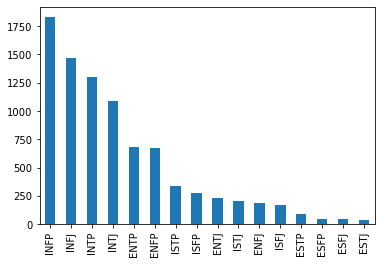

In [21]:
dist_personality.plot(kind='bar')

In [22]:
# from first glance it seems we have more introverts in this sample.

In [23]:
# instead of just removing links we reconned that introverts might have more time online and a way to get 
# that from the data could be to get amount of links shared by each person and compare the distribution 
# neglecting outliers of course. # number of mentions we feel won't reflect online presence since everyone
# has 50 posts from the data collectiong as given in the description in kaggle and we can't exactly say
# introverts mention people the most. So another feature could be no of links shared.

In [24]:
def online_frequency(col):
    '''This function gets the could of links shared in all of the persons post'''
    url_pattern = re.compile(r'(https?:\/\/|ftp:\/\/)+[\w/\-?=%.]+\.[\w\!\£\$\%\^\&\*\(\)\_\+\-\=\{\\}\~\[\]\#\:\@\;\'\<\>\?\,\.\/\\]+')
    site_visits= []
    count = 0
    for p in col:
        url_match = url_pattern.finditer(p)
        for url_mat in url_match:
            count +=1
        site_visits.append(count)
        count= 0
    return site_visits


In [25]:
personality['online_freq'] = online_frequency(personality.posts)

In [26]:
# distribution of online_frequency to verify our thesis.

In [27]:
personality.head()

,type,posts,online_freq
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,24
1,ENTP,'I'm finding the lack of me in these posts ver...,9
2,INTP,'Good one _____ https://www.youtube.com/wat...,5
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",2
4,ENTJ,You're fired.|||That's another silly misconcep...,6


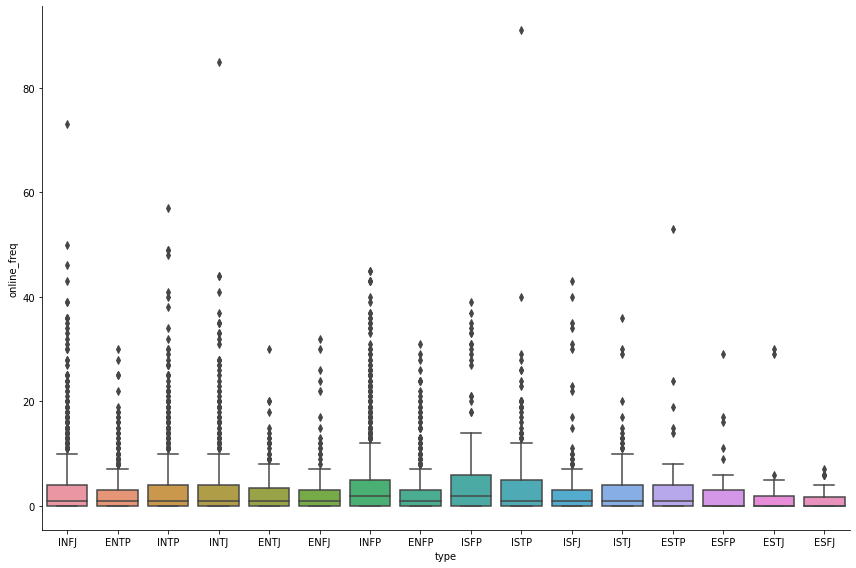

In [28]:
# Distribution of assumed online activity.
sns.catplot('type', 'online_freq', kind= 'box', data= personality, height= 8, aspect=1.5, )

In [29]:
# we actually notice smaller distributions among extroverts but this could just be due to the fact that they
# are less in the sample but why are they less ?. As extroversion implies they prefer the outside world.

In [30]:
# let's generalize more 
def intro_extro(text):
    if 'I' in text:
        return 'Introversion'
    else:
        return 'Extroversion'

In [31]:
personality['Intro_extro'] = personality.type.apply(intro_extro)

In [32]:
personality.head()

,type,posts,online_freq,Intro_extro
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,24,Introversion
1,ENTP,'I'm finding the lack of me in these posts ver...,9,Extroversion
2,INTP,'Good one _____ https://www.youtube.com/wat...,5,Introversion
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",2,Introversion
4,ENTJ,You're fired.|||That's another silly misconcep...,6,Extroversion


In [33]:
# let's get a clearer view of ratio of introverts to extroverts
personality['Intro_extro'].value_counts(normalize= True)

Introversion    0.769568
Extroversion    0.230432
Name: Intro_extro, dtype: float64

we have 77% of introverts in the dataset, that's imbalanced

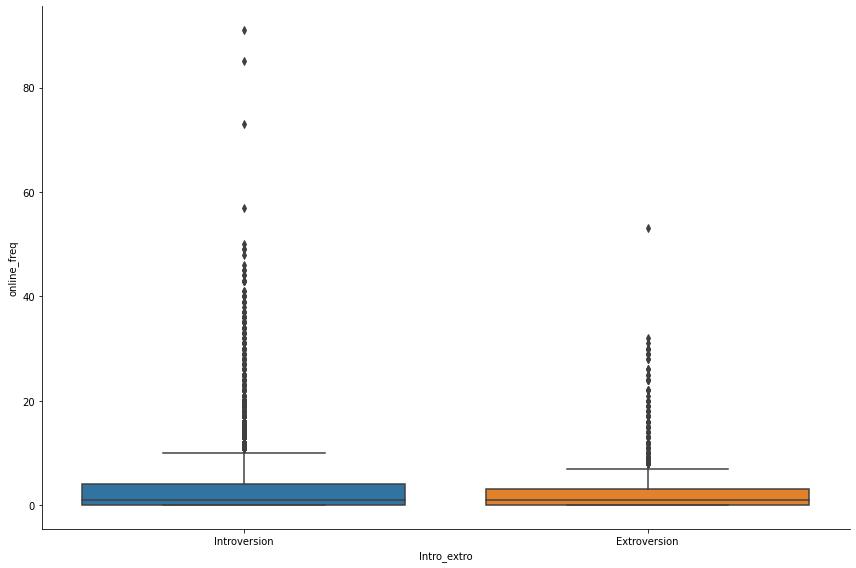

In [34]:
# better distribution of assumed online activity
sns.catplot('Intro_extro', 'online_freq', kind= 'box', data= personality, height= 8, aspect=1.5)

In [35]:
# wanted to verify the outliers to be sure the regex did the right thing.
personality[personality.online_freq >80]

,type,posts,online_freq,Intro_extro
382,ISTP,'Rough. Trade.|||https://www.youtube.com/watch...,91,Introversion
521,INTJ,'I'm bored as hell and there isn't anything to...,85,Introversion


([<matplotlib.axis.XTick at 0x28edb1b9910>,
 <a list of 20 Text major ticklabel objects>)

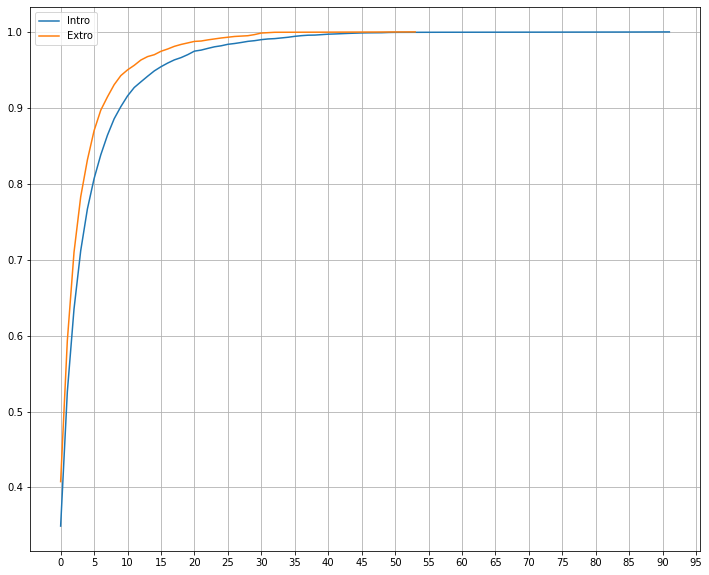

In [36]:
# A cdf will be better
plt.figure(figsize=(12,10))
intro = emd.Cdf.from_seq(personality[personality.Intro_extro == 'Introversion']['online_freq'])
extro = emd.Cdf.from_seq(personality[personality.Intro_extro == 'Extroversion']['online_freq'])

intro.plot(label= 'Intro')
extro.plot(label= 'Extro')
plt.legend()
plt.grid()
plt.xticks(list(range(0, 100, 5)))

In [37]:
# viewing the 90th percentiles
print(intro.inverse(0.90))
extro.inverse(0.9)

# basically this means at the 90% of introverts share <= 9 links and 90% extroverts share <= 7 links.

9.0


array(7.)

In [38]:
# It seems that neglecting outliers the introverts have a very slightly higher online freq. This could just 
# be due to the fact that they are more in the dataset. we can't really say it show online dominance of 
# introverts. 

In [39]:
# some other question asked could be do intoverts or some class of personalities post longer texts than 
# others ?

In [40]:
# some new feature 
# some cleaning.

personality = remlinks_symbs(personality)

In [41]:
personality.post = personality.post.apply(rem_pos)

In [42]:
personality.tail()

,type,posts,online_freq,Intro_extro,post
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...,7,Introversion,|||IxFP just because I always think of cats as...
8671,ENFP,'So...if this thread already exists someplace ...,2,Extroversion,So if this thread already exists someplace els...
8672,INTP,'So many questions when i do these things. I ...,2,Introversion,So many questions when i do these things I wou...
8673,INFP,'I am very conflicted right now when it comes ...,0,Introversion,I am very conflicted right now when it comes t...
8674,INFP,'It has been too long since I have been on per...,3,Introversion,It has been too long since I have been on pers...


In [43]:
# some posts aren't up to 50.
t = personality.post[774]

In [44]:
t

"Says you He's not cute he's pure evil in miniature form When he takes over the world we will be forced to have Mexican hat day every th of the month Those not wearing a mexican hat "

In [45]:
def length_of_posts(post):
    new_post = []
    len_of_post = []
# basically, we loop through the bunch of text and using the find all, we find every text till we get
# to the seperator(|||), so that's one sentence. Then we remove the seperator{|||} and split words in each
# sentence, then do a count.
    for each_post in re.findall(r'[\w\' ]+[||]+', post):
        #print(each_post)
        each_post = each_post.replace('|', '')
        new_post.append(each_post)
    for each in new_post:
        len_of_post.append(len(each.split()))
    # we choose the average of the 25th and 75th percentiles after a few visualizations
    
    # in some cases the posts aren't up to 50 this could actually affect this feature because we would 
    # for instance in a case of two posts would be assuming that's the person's general post behaviour
    
    # we could take the number of posts as another feature to check if majority of the posts are many. 
    try:
        value = int(round((np.percentile(len_of_post, 25)+ np.percentile(len_of_post, 75))/2))
        return value
    except IndexError:
        return 0
 

In [46]:
personality.head()

,type,posts,online_freq,Intro_extro,post
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,24,Introversion,||||||enfp and intj moments |||What has been t...
1,ENTP,'I'm finding the lack of me in these posts ver...,9,Extroversion,I'm finding the lack of me in these posts very...
2,INTP,'Good one _____ https://www.youtube.com/wat...,5,Introversion,Good one |||Of course to which I say I know t...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",2,Introversion,Dear INTP I enjoyed our conversation the other...
4,ENTJ,You're fired.|||That's another silly misconcep...,6,Extroversion,You're fired |||That's another silly misconcep...


In [47]:
personality['len_of_posts'] = personality.post.apply(length_of_posts)

In [48]:
personality.head()

,type,posts,online_freq,Intro_extro,post,len_of_posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,24,Introversion,||||||enfp and intj moments |||What has been t...,15
1,ENTP,'I'm finding the lack of me in these posts ver...,9,Extroversion,I'm finding the lack of me in these posts very...,26
2,INTP,'Good one _____ https://www.youtube.com/wat...,5,Introversion,Good one |||Of course to which I say I know t...,22
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",2,Introversion,Dear INTP I enjoyed our conversation the other...,22
4,ENTJ,You're fired.|||That's another silly misconcep...,6,Extroversion,You're fired |||That's another silly misconcep...,22


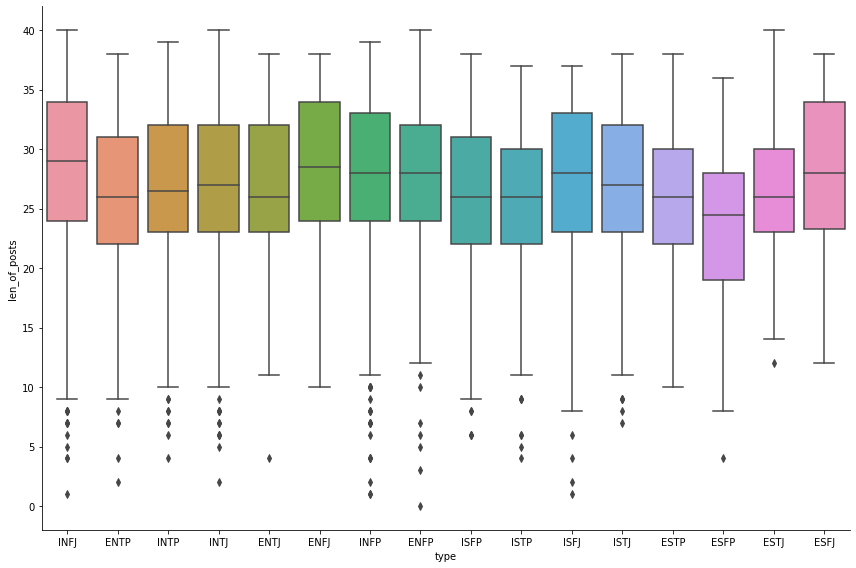

In [49]:
sns.catplot('type', 'len_of_posts', kind= 'box', data= personality, height= 8, aspect=1.5)

In [50]:
# There's really no significant difference. For example entp and infj. Entp has a median of about 26words
# infj has of about 29, so a difference of three. So generally some groups have slightly lower no of words.

# But Esfp seems to have the lowest distribution as but they are also small in the data set, but they 
# aren't the estj and esfp are around the same number in the dataset so it can't really say their amount
# in the dataset is a reason maybe that group actually don't post much

Above we notice 

In [51]:
# Getting our final Train and test data

In [52]:
labenc = LabelEncoder()

In [53]:
personality['type_encoded'] = labenc.fit_transform(personality.type)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(personality.drop('type', axis= 1), 
                                                    personality.type_encoded, 
                                                    test_size=0.3, random_state=42,
                                                    stratify= personality.type_encoded)

In [55]:
# using the stratify parameter we basically do a stratified split. so distribution of personality type 
# remains the same as in original dataset
y_train.value_counts(normalize= True)

9     0.211133
8     0.169466
11    0.150362
10    0.125823
3     0.078887
1     0.077734
15    0.038867
13    0.031291
2     0.026680
14    0.023715
0     0.021904
12    0.019104
7     0.010211
5     0.005599
4     0.004776
6     0.004447
Name: type_encoded, dtype: float64

In [56]:
new_features = ['online_freq', 'len_of_posts']

In [57]:
%%time
# Here we just call the bow function of xtrain and xtest and it does the cleaning and vectorizing.
train_test = BOW(X_train, X_test)

Wall time: 1min 40s


In [58]:
train_vector = train_test[0]

In [59]:
# adding other two features to train
train_vector = pd.concat([train_vector, X_train[new_features].reset_index().drop('index', axis= 1)], 
                         axis= 1)

In [60]:
train_vector.head()

,abilities,ability,able,absolute,absolutely,absorbed,abstract,absurd,abuse,abusive,...,youre,youth,youtube,yup,z,zero,zombie,zone,online_freq,len_of_posts
0,0.0,0.000000,0.0,0.0,0.030903,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2,30
1,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,12,14
2,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,24,20
3,0.0,0.026529,0.0,0.0,0.022244,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,34
4,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.056129,0.0,0.0,0.0,0.0,0.0,0.0,3,33


In [61]:
test_vector = train_test[1]

In [62]:
# adding other two features to test
test_vector = pd.concat([test_vector, X_test[new_features].reset_index().drop('index', axis= 1)], 
                         axis= 1)

In [63]:
test_vector.head()

,abilities,ability,able,absolute,absolutely,absorbed,abstract,absurd,abuse,abusive,...,youre,youth,youtube,yup,z,zero,zombie,zone,online_freq,len_of_posts
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0,29
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,8,12
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.047737,0.059911,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.055111,0.0,0.000000,0,28
3,0.0,0.0,0.028447,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.055473,2,26
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,1,26


In [64]:
## MODELLING

In [65]:
xg = XGBClassifier()

In [66]:
xg.fit(train_vector, y_train)

C:\Users\Chigozie\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:00:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [67]:
xg_pred = xg.predict(test_vector)

In [70]:
accuracy_score(y_test, xg_pred)

0.6638494045332309